In [1]:
#classification problem solve by DecisionTreeClassifier algorithm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset
df=pd.read_csv("insurance.csv")
#to show first 5 records
df.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [3]:
#To check null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [5]:
#To check datatype
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [6]:
#Check given dataset is balance or not?
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [ ]:
#Here dataset is not imbalance

In [7]:
#Select Input and output from given dataset
X=df.drop('insuranceclaim',axis=1) #input
Y=df['insuranceclaim']#output

In [8]:
X.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
#Apply StandardScaler
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [12]:
X_train

array([[ 0.79715222,  0.97676557, -0.70211414, ..., -0.50966434,
        -0.48216742, -0.3649877 ],
       [-1.27108519, -1.02378711, -0.70375759, ..., -0.50966434,
         1.31230059, -0.87598251],
       [-0.98581107,  0.97676557, -0.73333977, ..., -0.50966434,
        -1.37940142, -0.86584848],
       ...,
       [ 0.86847075, -1.02378711,  0.70303946, ...,  1.96207567,
        -1.37940142,  2.57280264],
       [ 0.0839669 , -1.02378711, -1.39072157, ...,  1.96207567,
         0.41506659,  0.50592019],
       [ 1.29638193,  0.97676557, -0.4506656 , ..., -0.50966434,
         0.41506659, -0.14129313]])

In [13]:
#create user defined function
def create_model(model):
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
#perform baseline model(Logistic Regression)
from sklearn.linear_model import LogisticRegression

In [16]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [17]:
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.91      0.89      0.90       245

    accuracy                           0.88       402
   macro avg       0.87      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402

[[136  21]
 [ 27 218]]


In [18]:
#apply DecisionTreeClassifier class 
#means given dataset into DecisionTreeClassifier algorithm
#perform dataset with the help of DecisionTreeClassifier 
#call DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

In [19]:
#Create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier() #By default use method gini index
#means formula : 1-P(yes)^2-Q(no)^2 : find impurities of each input features

In [20]:
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402

[[154   3]
 [  3 242]]


In [23]:
#show the information gain of all input features , use inbuilt method
#feature_importances_ of DecisionTreeClassifier
dt.feature_importances_ 

array([0.0633924 , 0.        , 0.4259328 , 0.32951284, 0.16581384,
       0.        , 0.01534812])

In [24]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [25]:
dic={'Input Feature':X.columns,'Information Gain':dt.feature_importances_ }
df1=pd.DataFrame(dic)
df1

Input Feature  Information Gain
0           age          0.063392
1           sex          0.000000
2           bmi          0.425933
3      children          0.329513
4        smoker          0.165814
5        region          0.000000
6       charges          0.015348

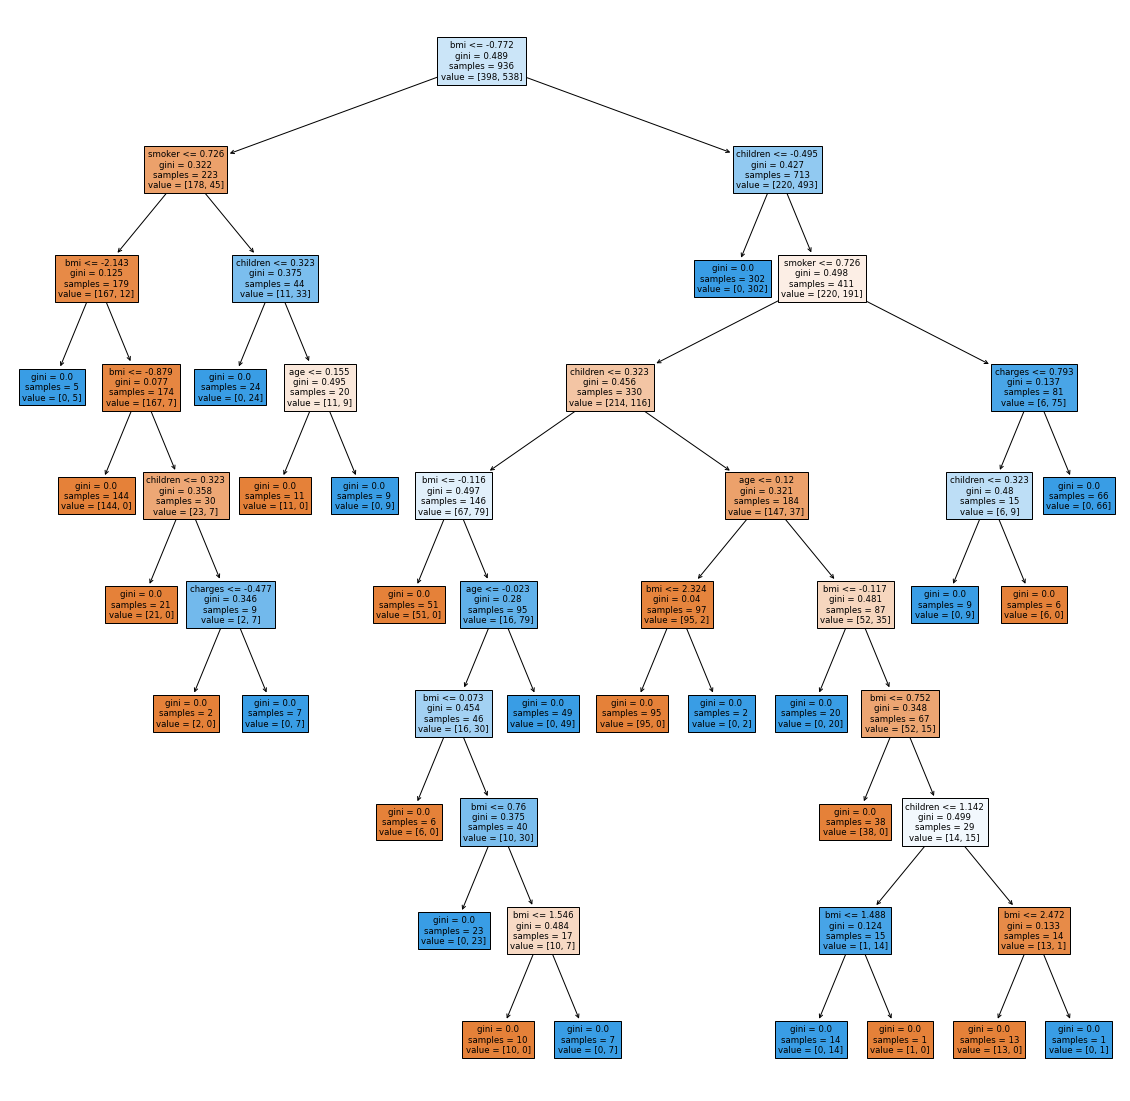

In [26]:
#create the tree 
from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [28]:
#Entropy:
dt1=DecisionTreeClassifier(criterion='entropy')#bydefault criterion='gini'
#-P(yes)*log2(P(yes))-P(No)*log2(P(No))
# -P*log(P)-Q

In [29]:
#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402

[[154   3]
 [  3 242]]
